# CREDIT SCORE ANALYSIS USING M-PESA STATEMENTS

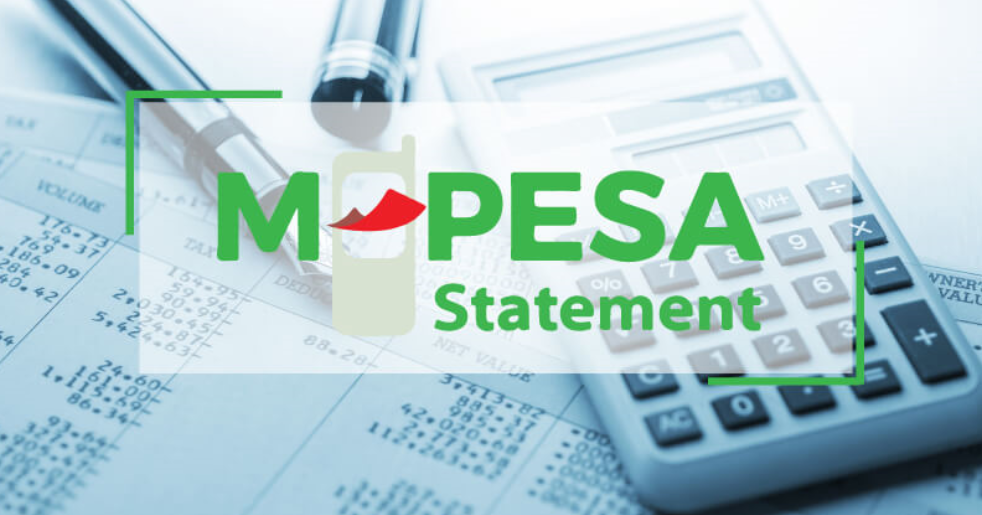

## GOAL!

The goal of this analysis is to develop a comprehensive credit scoring system for individuals based on their M-Pesa transaction history. By leveraging various transaction-related features, such as completion time, transaction status, withdrawal patterns, and negative balances, the project aims to assess the creditworthiness of users.

## OVERVIEW

This system won't just assign a number; it's designed to tell a story about each person's financial journey. The ultimate goal is to empower individuals by revealing their eligibility for loans. Think of it as a tool that provides human-like insights, aiding real people in making informed financial decisions. Imagine it as a friend who knows your financial behavior and guides you towards the best opportunities, especially in the realm of Savings and Credit Cooperative Organizations (SACCOs) or similar community-focused institutions.

##  BUSINESS UNDERSTANDING

## a.) What is it?

The mission is to make borrowing money a bit fairer and more understandable for everyone. We're working on a system that looks at how people handle their M-Pesa transactions, like paying bills or sending money, to help businesses decide if they can trust someone to pay back a loan. Specifically, we're thinking about how this can benefit groups like SACCOs, making it easier for them to know their customers better.

## b.) What is it solving?

Sometimes, the usual credit scores miss the whole picture of how someone manages their money day-to-day. We noticed that there's a need for a system that sees people's financial lives more like stories, not just numbers. Especially for groups like SACCOs, who want to lend money wisely, understanding these stories is super important.

## c.) What is the main objective?

To create a system that gets how people really handle their money, especially when it comes to M-Pesa. We want to help businesses, like SACCOs, understand their customers beyond just a credit score – more like getting to know someone's financial story and a point of service certification for those with credible scores for loans so as to be used in other institutions.

## d.) Specific Objectives

- We want to make a credit score that looks at things like paying on time, how often someone makes transactions, and other money habits.
Customize for SACCOs or other financial institutions

- We're making sure our system fits right in with how SACCOs work, so they can use it easily and it matches what they need.
Give Useful Info to Businesses:

- We're not just about numbers. We want to give businesses info they can actually use, so they can really understand how their customers handle money.

## e.) How is the design?

1. Data Collection 
2. Data Cleaning
3. Feature Engineering
4. Modeling and visualization
5. Analysis

## THE DATA

### i. Data Collection 

The data comes from MPESA Statement is derived from USSD Code *334# for a month. Since the data came in form of a PDF data had to be converted to CSV format using the link https://products.groupdocs.app/conversion/pdf-to-csv which also due security purposes enables you to insert passcode given once downloaded the statement as an OTP code.

In [1]:
# Load the the MPESA Statement data into the variable
MPESA_csv = r"C:\Users\Administrator\OneDrive\Desktop\CREDIT SCORE API\MPESA_Statement_2023-12-10_to_2024-01-10_2547xxxxxx990.csv"


In [2]:
# Importing the libraries
import numpy as np
from numpy import int64
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Load CSV file into a dataframe
df = pd.read_csv(MPESA_csv)
df

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,SA90IP470Q,09-01-24 13:51,Customer Transfer of Funds\nCharge,Completed,NaN,-57,239.84
1,SA90IP470Q,09-01-24 13:51,Customer Transfer to -,Completed,NaN,"-4,000.00",296.84
2,NaN,NaN,2547******000 FADHILI,NaN,NaN,NaN,NaN
3,NaN,NaN,KHANYANJI,NaN,NaN,NaN,NaN
4,SA95IM4C4P,09-01-24 13:34,Funds received from -\n2547******715 DAVID KIRITU,Completed,300,NaN,"4,296.84"
...,...,...,...,...,...,...,...
227,NaN,NaN,KUGERIA,NaN,NaN,NaN,NaN
228,RLC9YC695D,12-12-23 17:32,Customer Transfer to -,Completed,NaN,-20,117
229,NaN,NaN,07******146 DESIRE,NaN,NaN,NaN,NaN
230,NaN,NaN,MPAWENIMANA,NaN,NaN,NaN,NaN


In [4]:
# Load the data types of each column in the dataframe
df.dtypes

Receipt No.           object
Completion Time       object
Details               object
Transaction Status    object
Paid In               object
Withdrawn             object
Balance               object
dtype: object

In [5]:
print(df.columns)

Index(['Receipt No.', 'Completion Time', 'Details', 'Transaction Status',
       'Paid In', 'Withdrawn', 'Balance'],
      dtype='object')


### ii. Data Cleaning and Preprocessing

In [6]:
# Replace the withdrawn column missing values with '0'
df['Withdrawn'].fillna(0, inplace=True)

In [7]:
# Convert 'Completion Time' with corrected format of datetime
df['Completion Time'] = pd.to_datetime(df['Completion Time'], format='%d-%m-%y %H:%M', errors='coerce')

In [8]:
# Convert 'Withdrawn' and 'Balance' to numeric (remove commas and convert to float)
df['Withdrawn'] = df['Withdrawn'].replace({',': ''}, regex=True).astype(float)
df['Balance'] = df['Balance'].replace({',': ''}, regex=True).astype(float)
df

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,SA90IP470Q,2024-01-09 13:51:00,Customer Transfer of Funds\nCharge,Completed,NaN,-57.0,239.84
1,SA90IP470Q,2024-01-09 13:51:00,Customer Transfer to -,Completed,NaN,-4000.0,296.84
2,NaN,NaT,2547******000 FADHILI,NaN,NaN,0.0,NaN
3,NaN,NaT,KHANYANJI,NaN,NaN,0.0,NaN
4,SA95IM4C4P,2024-01-09 13:34:00,Funds received from -\n2547******715 DAVID KIRITU,Completed,300,0.0,4296.84
...,...,...,...,...,...,...,...
227,NaN,NaT,KUGERIA,NaN,NaN,0.0,NaN
228,RLC9YC695D,2023-12-12 17:32:00,Customer Transfer to -,Completed,NaN,-20.0,117.00
229,NaN,NaT,07******146 DESIRE,NaN,NaN,0.0,NaN
230,NaN,NaT,MPAWENIMANA,NaN,NaN,0.0,NaN


In [9]:
# Encode 'Transaction Status'
df['Transaction Status'] = df['Transaction Status'].astype('category').cat.codes

### iii.) Feature Engineering

### Transaction Frequency

In [10]:
# Create a new column for transaction date
df['Transaction Date'] = df['Completion Time'].dt.date

# Per day 
transactions_per_day = df['Transaction Date'].value_counts().sort_index()
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,Transaction Date
0,SA90IP470Q,2024-01-09 13:51:00,Customer Transfer of Funds\nCharge,0,NaN,-57.0,239.84,2024-01-09
1,SA90IP470Q,2024-01-09 13:51:00,Customer Transfer to -,0,NaN,-4000.0,296.84,2024-01-09
2,NaN,NaT,2547******000 FADHILI,-1,NaN,0.0,NaN,NaT
3,NaN,NaT,KHANYANJI,-1,NaN,0.0,NaN,NaT
4,SA95IM4C4P,2024-01-09 13:34:00,Funds received from -\n2547******715 DAVID KIRITU,0,300,0.0,4296.84,2024-01-09


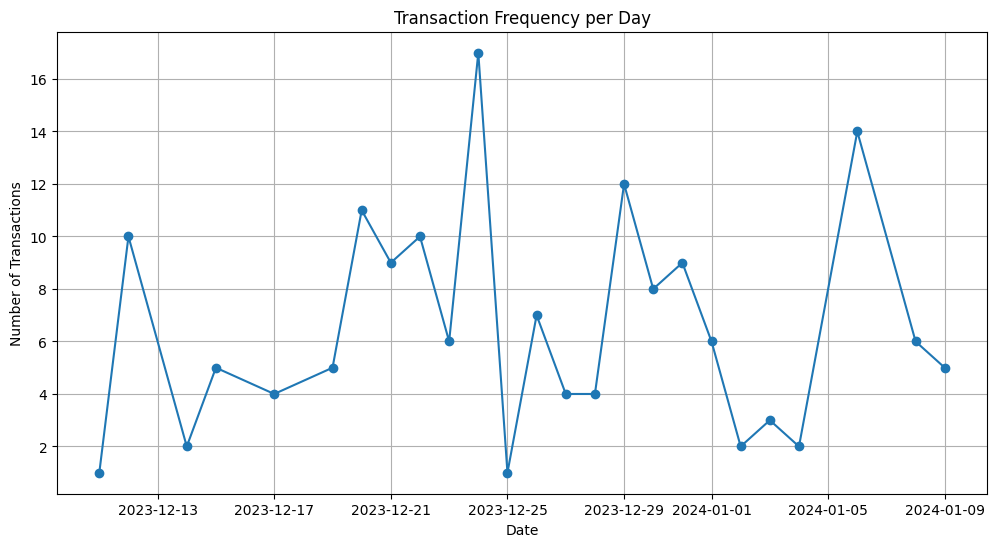

In [11]:
# Plotting the transaction frequency per day
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_day.index, transactions_per_day.values, marker='o')
plt.title('Transaction Frequency per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In [12]:
# Create a new column for transaction week
df['Transaction Week'] = df['Completion Time'].dt.isocalendar().week

# Per week
transactions_per_week = df['Transaction Week'].value_counts().sort_index()
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,Transaction Date,Transaction Week
0,SA90IP470Q,2024-01-09 13:51:00,Customer Transfer of Funds\nCharge,0,NaN,-57.0,239.84,2024-01-09,2
1,SA90IP470Q,2024-01-09 13:51:00,Customer Transfer to -,0,NaN,-4000.0,296.84,2024-01-09,2
2,NaN,NaT,2547******000 FADHILI,-1,NaN,0.0,NaN,NaT,<NA>
3,NaN,NaT,KHANYANJI,-1,NaN,0.0,NaN,NaT,<NA>
4,SA95IM4C4P,2024-01-09 13:34:00,Funds received from -\n2547******715 DAVID KIRITU,0,300,0.0,4296.84,2024-01-09,2


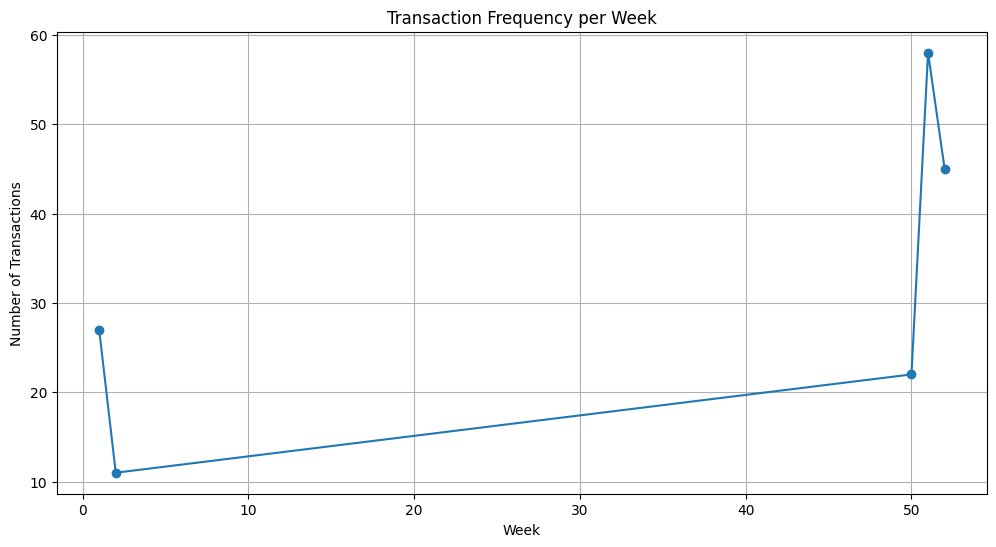

In [13]:
# Plotting the transaction frequency per week
plt.figure(figsize=(12, 6))
plt.plot(transactions_per_week.index, transactions_per_week.values, marker='o')
plt.title('Transaction Frequency per Week')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

### Transaction Type

In [14]:
# Function to categorize transaction types based on keywords
def categorize_transaction_type(details):
    details = details.lower()  # Convert to lowercase for case-insensitive matching
    
    if 'transfer' in details:
        return 'Transfer'
    elif 'payment' in details or 'bill' in details:
        return 'Payment'
    elif 'withdraw' in details:
        return 'Withdrawal'
    else:
        return 'Other'

# Apply the categorization function to create a new column 'Transaction Type'
df['Transaction Type'] = df['Details'].apply(categorize_transaction_type)

# Display the dataframe with the new 'Transaction Type' column
print(df[['Completion Time', 'Details', 'Transaction Type']])

        Completion Time                                            Details  \
0   2024-01-09 13:51:00                 Customer Transfer of Funds\nCharge   
1   2024-01-09 13:51:00                             Customer Transfer to -   
2                   NaT                              2547******000 FADHILI   
3                   NaT                                          KHANYANJI   
4   2024-01-09 13:34:00  Funds received from -\n2547******715 DAVID KIRITU   
..                  ...                                                ...   
227                 NaT                                            KUGERIA   
228 2023-12-12 17:32:00                             Customer Transfer to -   
229                 NaT                                 07******146 DESIRE   
230                 NaT                                        MPAWENIMANA   
231 2023-12-11 18:33:00  Merchant Payment to 118872 -\nQuick Mart Embakasi   

    Transaction Type  
0           Transfer  
1           Trans

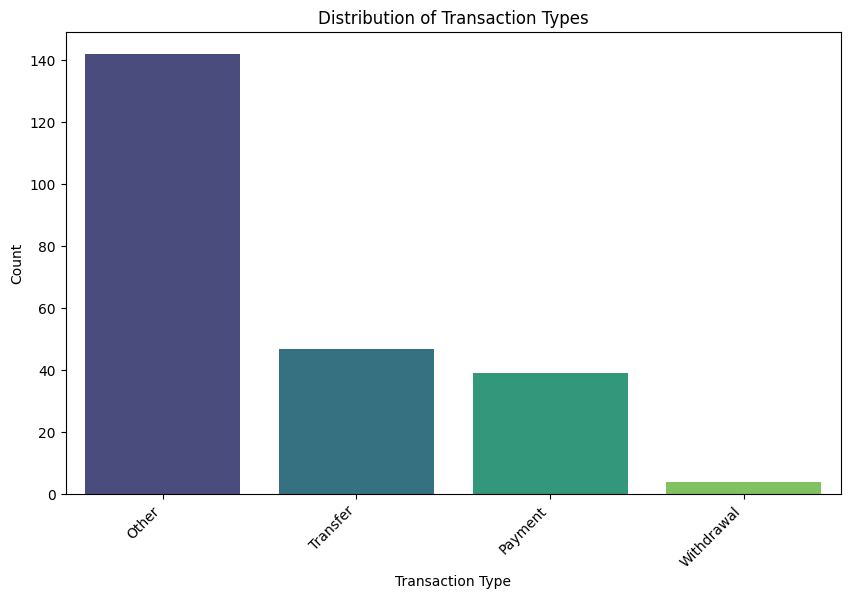

In [18]:
import seaborn as sns

# Count the occurrences of each transaction type
transaction_type_counts = df['Transaction Type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values, palette='viridis')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,Transaction Date,Transaction Week,Transaction Type
0,SA90IP470Q,2024-01-09 13:51:00,Customer Transfer of Funds\nCharge,0,NaN,-57.0,239.84,2024-01-09,2,Transfer
1,SA90IP470Q,2024-01-09 13:51:00,Customer Transfer to -,0,NaN,-4000.0,296.84,2024-01-09,2,Transfer
2,NaN,NaT,2547******000 FADHILI,-1,NaN,0.0,NaN,NaT,<NA>,Other
3,NaN,NaT,KHANYANJI,-1,NaN,0.0,NaN,NaT,<NA>,Other
4,SA95IM4C4P,2024-01-09 13:34:00,Funds received from -\n2547******715 DAVID KIRITU,0,300,0.0,4296.84,2024-01-09,2,Other


### Average for each Transaction 

In [19]:
# Group by Transaction Type and calculate the average amount
average_transaction_amount = df.groupby('Transaction Type')['Withdrawn'].mean()

# Display the average transaction amount for each transaction type
print(average_transaction_amount)

Transaction Type
Other         -11.640845
Payment      -136.017179
Transfer     -168.212766
Withdrawal   -139.500000
Name: Withdrawn, dtype: float64


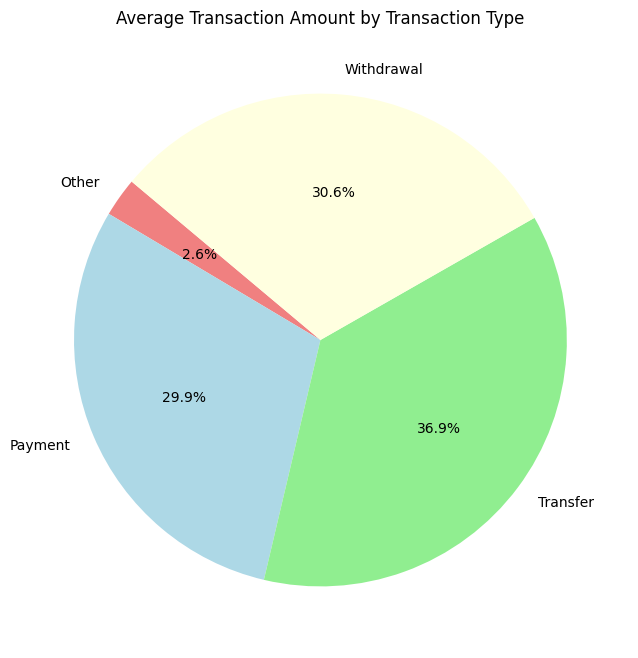

In [20]:
# Absolute values of average transaction amounts
positive_average_transaction_amount = average_transaction_amount.abs()

# Plotting the average transaction amount for each transaction type as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(positive_average_transaction_amount, labels=positive_average_transaction_amount.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
plt.title('Average Transaction Amount by Transaction Type')
plt.show()

### Time of Day Analysis:

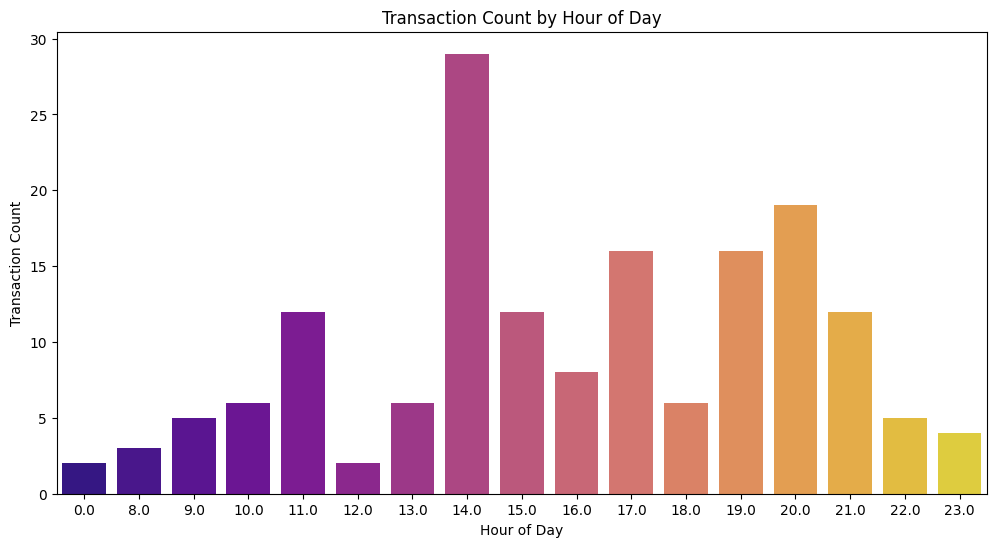

In [21]:
# Extract hour of the day from 'Completion Time'
df['Hour of Day'] = df['Completion Time'].dt.hour

# Plotting the time trends
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour of Day', data=df, palette='plasma')
plt.title('Transaction Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.show()

### Occurrences of negative balances

In [22]:
# Count occurrences of negative balances
negative_balance_counts = df[df['Balance'] < 0].shape[0]

# Print the number of occurrences
print(f"Number of occurrences with negative balance: {negative_balance_counts}")

Number of occurrences with negative balance: 0


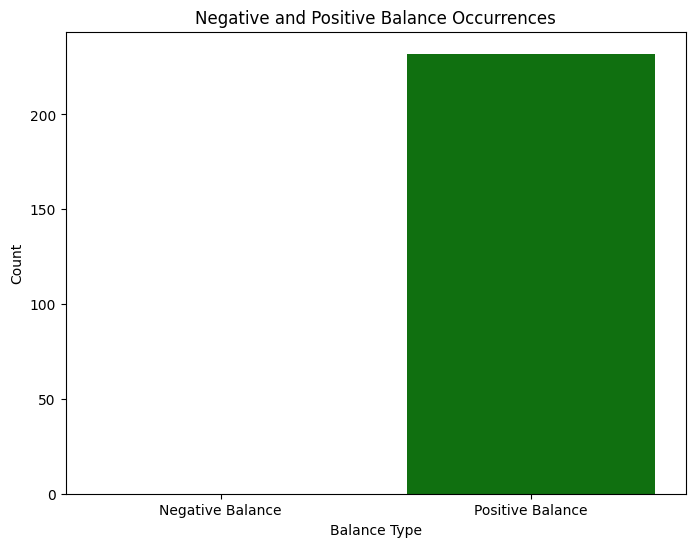

In [23]:
# Create a bar plot for negative and positive balance occurrences
balance_counts = pd.Series([negative_balance_counts, len(df) - negative_balance_counts], index=['Negative Balance', 'Positive Balance'])

plt.figure(figsize=(8, 6))
sns.barplot(x=balance_counts.index, y=balance_counts.values, palette=['red', 'green'])
plt.title('Negative and Positive Balance Occurrences')
plt.xlabel('Balance Type')
plt.ylabel('Count')
plt.show()

## THE MODELING

In [25]:
# Define a function to categorize creditworthiness based on conditions
def categorize_creditworthiness(balance):
    # You can define your own conditions based on your business logic
    if balance >= 0:
        return 1  # Creditworthy
    else:
        return 0  # Not Creditworthy

# Apply the function to create a new column 'Creditworthiness'
df['Creditworthiness'] = df['Balance'].apply(categorize_creditworthiness)

# Display the dataframe with the new 'Creditworthiness' column
print(df[['Completion Time', 'Details', 'Transaction Type', 'Balance', 'Creditworthiness']])


        Completion Time                                            Details  \
0   2024-01-09 13:51:00                 Customer Transfer of Funds\nCharge   
1   2024-01-09 13:51:00                             Customer Transfer to -   
2                   NaT                              2547******000 FADHILI   
3                   NaT                                          KHANYANJI   
4   2024-01-09 13:34:00  Funds received from -\n2547******715 DAVID KIRITU   
..                  ...                                                ...   
227                 NaT                                            KUGERIA   
228 2023-12-12 17:32:00                             Customer Transfer to -   
229                 NaT                                 07******146 DESIRE   
230                 NaT                                        MPAWENIMANA   
231 2023-12-11 18:33:00  Merchant Payment to 118872 -\nQuick Mart Embakasi   

    Transaction Type  Balance  Creditworthiness  
0           T

### Decision Tree Model

In [62]:
from sklearn.impute import SimpleImputer

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model with imputed data
dt_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_imputed)

# Evaluate the decision tree model
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Confusion Matrix:
[[33]]


- Classification Report:

Accuracy: 1.0 (100%)

All predictions made by the model are correct.
Precision: 1.0 (100%)

Of all instances predicted as positive (class 1), all are correct.
Recall: 1.0 (100%)

The model captures all instances of the positive class in the dataset.
F1-score: 1.0 (100%)

An F1-score of 1.0 indicates perfect precision and recall.

- Confusion Matrix:

True Positives (TP): 33 instances of class 1 correctly predicted.
True Negatives (TN): No instances of class 0 incorrectly predicted as class 1.
False Positives (FP): No instances of class 1 incorrectly predicted as class 0.
False Negatives (FN): No instances of class 0 incorrectly predicted as class 1.

Given that all metrics are perfect (precision, recall, and F1-score of 1.0), it seems like your Decision Tree model is performing exceptionally well.

### Naive Bayes Model

In [63]:
from sklearn.impute import SimpleImputer

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes model with imputed data
nb_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_imputed)

print("\nNaive Bayes Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Model Performance:
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33


Confusion Matrix:
[[33]]


Both models (Decision Tree and Naive Bayes) seem to be performing extremely well on your test set.